# Import the different libraries

In [2]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import tensorflow as tf
 import seaborn as sns
 from sklearn.preprocessing import StandardScaler
 from sklearn.model_selection import train_test_split

We can now use the read_csv function to read the file into pandas dataframe

In [3]:
cardio_data = pd.read_csv('Cardiotocographic.csv')

We can inspect the first row

In [4]:
cardio_data = pd.read_csv('Cardiotocographic.csv')

cardio_data.head()

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,2.4,64,62,126,2
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,10.4,130,68,198,1
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,13.4,130,68,198,1
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,23.0,117,53,170,1
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,19.9,117,53,170,1


We can inspect the last row

In [5]:
cardio_data.tail()

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
2121,140,0.000000,0.000000,0.007426,0.0,0.0,0.0,79,0.2,25,7.2,40,137,177,2
2122,140,0.000775,0.000000,0.006971,0.0,0.0,0.0,78,0.4,22,7.1,66,103,169,2
2123,140,0.000980,0.000000,0.006863,0.0,0.0,0.0,79,0.4,20,6.1,67,103,170,2
2124,140,0.000679,0.000000,0.006110,0.0,0.0,0.0,78,0.4,27,7.0,66,103,169,2
2125,142,0.001616,0.001616,0.008078,0.0,0.0,0.0,74,0.4,36,5.0,42,117,159,1


In [6]:
cardio_data.describe()

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003170,0.009474,0.004357,0.001885,0.000004,0.000157,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,1.304327
std,9.840844,0.003860,0.046670,0.002940,0.002962,0.000063,0.000580,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001876,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,1.000000
50%,133.000000,0.001630,0.000000,0.004482,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,1.000000
75%,140.000000,0.005631,0.002512,0.006525,0.003264,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,1.000000
max,160.000000,0.019284,0.480634,0.014925,0.015385,0.001353,0.005348,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,3.000000


In [7]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BPM     2126 non-null   int64  
 1   APC     2126 non-null   float64
 2   FMPS    2126 non-null   float64
 3   UCPS    2126 non-null   float64
 4   DLPS    2126 non-null   float64
 5   SDPS    2126 non-null   float64
 6   PDPS    2126 non-null   float64
 7   ASTV    2126 non-null   int64  
 8   MSTV    2126 non-null   float64
 9   ALTV    2126 non-null   int64  
 10  MLTV    2126 non-null   float64
 11  Width   2126 non-null   int64  
 12  Min     2126 non-null   int64  
 13  Max     2126 non-null   int64  
 14  NSP     2126 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 249.3 KB


In [8]:
cardio_data.shape

(2126, 15)

In [9]:
cardio_data['NSP'].value_counts()

1    1655
2     295
3     176
Name: NSP, dtype: int64

We have imbalanced classes with 77.8% of the observations belong to the Normal class. We can also use the seaborn countplot to visualise this.


<Axes: xlabel='NSP', ylabel='count'>

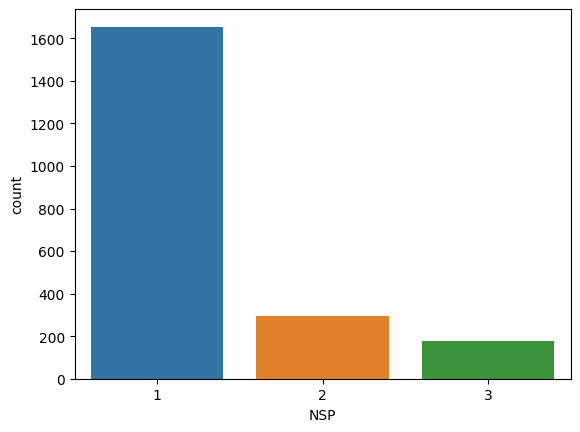

In [10]:
sns.countplot(cardio_data, x='NSP')

We are going to use the train_test_split from Scikit Learn to divide the data into a training dataset and a test dataset.

Normailising the data is important, not doing so may mean it takes longer to converge during training or fails to converge at all. The StandardScaler estimator will be used for this purpose.

The data will be scaled such that mean of each variable is 0, and the standard deviation is 1

We also deduct 1 from the values of the class labels in the NSP column. This is because Keras assumes our class labels start at 0,

So we have class 0 is Normal, class 1 is Susoect and class 2 is Pathologic. Since our dataset class label starts from 1.

In [12]:
x = cardio_data.drop('NSP', axis=1)
y = cardio_data['NSP'] -1

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify=y, random_state=0)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Now we want to train and build our neural network

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(9,activation='relu', input_shape=(14,)))
model.add(tf.keras.layers.Dense(3,activation='softmax'))


In [16]:
model.compile(optimizer= 'adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [19]:
model.summary()
model: 'sequential_1'

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 135       
                                                                 
 dense_1 (Dense)             (None, 3)                 30        
                                                                 
Total params: 165 (660.00 Byte)
Trainable params: 165 (660.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
class_weights = {0:1, 1:6.5, 2:9.4}

history = model.fit(x_train, y_train,  \
                    batch_size = 32, epochs=100,  \
                    verbose=2, class_weight=class_weights, \
                    validation_split=0.2)

Epoch 1/100
43/43 - 6s - loss: 85.2239 - accuracy: 0.4610 - val_loss: 12.8942 - val_accuracy: 0.3824 - 6s/epoch - 138ms/step
Epoch 2/100
43/43 - 0s - loss: 25.8311 - accuracy: 0.2728 - val_loss: 6.4961 - val_accuracy: 0.2000 - 232ms/epoch - 5ms/step
Epoch 3/100
43/43 - 0s - loss: 11.7266 - accuracy: 0.2963 - val_loss: 3.3101 - val_accuracy: 0.3706 - 202ms/epoch - 5ms/step
Epoch 4/100
43/43 - 0s - loss: 8.2849 - accuracy: 0.4169 - val_loss: 3.8250 - val_accuracy: 0.2471 - 192ms/epoch - 4ms/step
Epoch 5/100
43/43 - 0s - loss: 6.7976 - accuracy: 0.4537 - val_loss: 1.8364 - val_accuracy: 0.5088 - 145ms/epoch - 3ms/step
Epoch 6/100
43/43 - 0s - loss: 5.0521 - accuracy: 0.5301 - val_loss: 1.7376 - val_accuracy: 0.5176 - 149ms/epoch - 3ms/step
Epoch 7/100
43/43 - 0s - loss: 4.3327 - accuracy: 0.5596 - val_loss: 1.1103 - val_accuracy: 0.7353 - 140ms/epoch - 3ms/step
Epoch 8/100
43/43 - 0s - loss: 3.9856 - accuracy: 0.6206 - val_loss: 1.4126 - val_accuracy: 0.5206 - 138ms/epoch - 3ms/step
Epoch

Evaluating Our Neural Network

Now we have trained our neural network we want to review the accuracy and validationmetrics and also see how this network performs when making predictions for the test datawhich we held back.

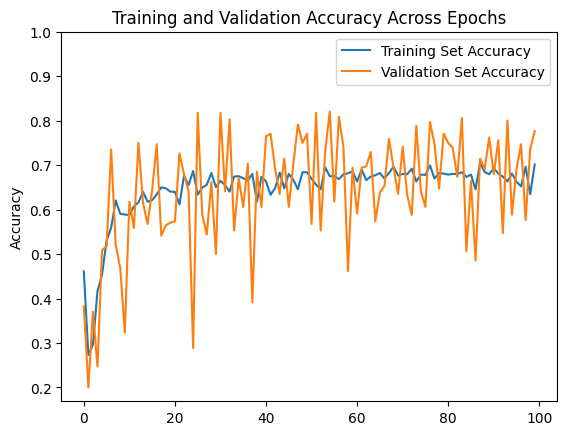

In [23]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label= 'Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

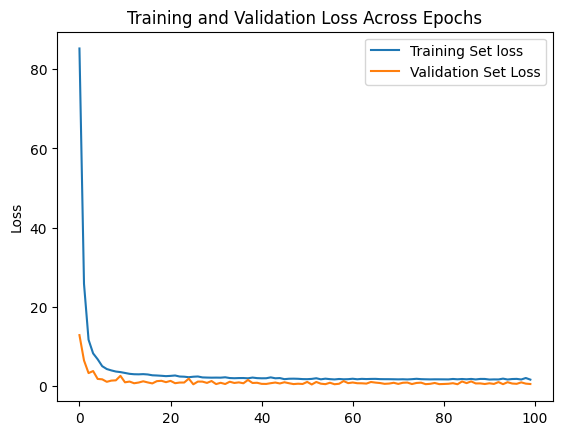

In [25]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(loss, label= 'Training Set loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Across Epochs')
plt.legend()

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
y_pred= model.predict(x_test)
y_pred = y_pred.argmax(axis=1)

14/14 [==============================] - 0s 5ms/step


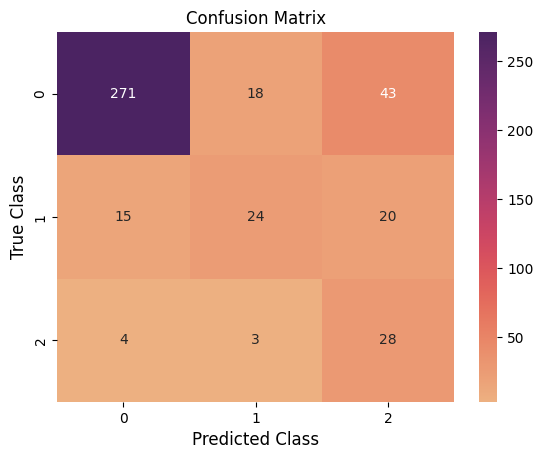

In [34]:
confusion_matrix = confusion_matrix(y_test,y_pred)

ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

plt.show()

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       332
           1       0.53      0.41      0.46        59
           2       0.31      0.80      0.44        35

    accuracy                           0.76       426
   macro avg       0.59      0.67      0.59       426
weighted avg       0.83      0.76      0.78       426

